In [9]:
import numpy as np
import keras as ks
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.constraints import maxnorm
from keras.layers import Dropout
from keras.optimizers import Adamax,Adam
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
import matplotlib.pyplot as plt

  




In [10]:
nod = 1058          #===========no. of data points============#
k1 = np.array([0.1903934, 0.3220935, 1.559453 ])
k2byk1 = np.arange(0.50,1.05,0.05) 		#======Ratio k2byk1========#

cosalpha = np.arange(0.50,1.00,0.01)	#======cosine of the angle between the k2 and k1 arms =======#

k2byk1 = k2byk1.reshape(11,1)

costheta = -cosalpha

B_02 = np.loadtxt('bk_norm15')
params_02 = np.loadtxt('params15')


B_02 = B_02/10000000.

In [11]:
ind = np.loadtxt('index')
index = np.zeros(len(ind),dtype = int)
for i in range(len(ind)):
    index[i] = ind[i]
    

In [12]:
B_test = B_02[index]
B_train = np.delete(B_02,index,axis=0)

p_test = params_02[index]
p_train = np.delete(params_02,index,axis=0)

In [6]:
B_train.shape

(1040, 550)

In [ ]:
init_mode='uniform'
class myCallback(ks.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>=0.98):
            print("\nReached 80% accuracy so cancelling training!")
            self.model.stop_training = True
callbacks = myCallback()
model = Sequential()
model.add(Dense(80, input_shape=[3,], activation='elu',kernel_initializer=init_mode,))
model.add(Dense(320,activation='elu',kernel_initializer=init_mode))
model.add(Dense(460,activation='elu',kernel_initializer=init_mode))
model.add(Dense(560,activation='elu',kernel_initializer=init_mode))
model.add(Dense(260,activation='elu',kernel_initializer=init_mode))
model.add(Dense(100,activation='elu',kernel_initializer=init_mode))
model.add(Dense(320,activation='elu',kernel_initializer=init_mode))
model.add(Dense(400,activation='elu',kernel_initializer=init_mode))

    #model.add(Dropout(dropout_rate))
model.add(Dense(550, activation='linear'))
    # Compile model
optimizer = Adamax(lr=0.0001, beta_1=0.2, beta_2=0.088)
model.compile(loss='mse', optimizer=Adam, metrics=['accuracy'])



In [ ]:
model.summary()

In [ ]:
history = model.fit(p_train,B_train,validation_split=0.038,batch_size=20,epochs=2000,callbacks=[callbacks])

In [13]:
class myCallback(ks.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>=0.98):
            print("\nReached 95% accuracy so cancelling training!")
            self.model.stop_training = True
callbacks = myCallback()
model = Sequential()
model.add(Dense(80,input_shape=[3,],activation='elu'))
model.add(Dense(320,activation='elu'))
model.add(Dense(460,activation='relu'))
model.add(Dense(560,activation='elu'))
model.add(Dense(260,activation='elu'))
model.add(Dense(100,activation='elu'))
model.add(Dense(11*50))
optimizer = Adam(lr = 0.0001,)   
model.compile(loss='mse', optimizer= optimizer, metrics=['accuracy'],)


In [14]:
history = model.fit(p_train,B_train,validation_split=0.038,batch_size=10,epochs=5000,callbacks=[callbacks])

Train on 1000 samples, validate on 40 samples
Epoch 1/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 21.3722 - accuracy: 0.1610 - val_loss: 16.5825 - val_accuracy: 0.2000
Epoch 2/5000
1000/1000 [==============================] - 1s 808us/step - loss: 13.0191 - accuracy: 0.2540 - val_loss: 9.9555 - val_accuracy: 0.7000
Epoch 3/5000
1000/1000 [==============================] - 1s 817us/step - loss: 7.9917 - accuracy: 0.6900 - val_loss: 8.9998 - val_accuracy: 0.8000
Epoch 4/5000
1000/1000 [==============================] - 1s 819us/step - loss: 5.8261 - accuracy: 0.7360 - val_loss: 8.4930 - val_accuracy: 0.7500
Epoch 5/5000
1000/1000 [==============================] - 1s 820us/step - loss: 5.3182 - accuracy: 0.7230 - val_loss: 8.4282 - val_accuracy: 0.7500
Epoch 6/5000
1000/1000 [==============================] - 1s 812us/step - loss: 4.7857 - accuracy: 0.7250 - val_loss: 7.8835 - val_accuracy: 0.7500
Epoch 7/5000
1000/1000 [==============================] - 1s 1ms/

1000/1000 [==============================] - 1s 1ms/step - loss: 0.6296 - accuracy: 0.8620 - val_loss: 2.0654 - val_accuracy: 0.8250
Epoch 57/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 1.7459 - accuracy: 0.8320 - val_loss: 1.2133 - val_accuracy: 0.8500
Epoch 58/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.6060 - accuracy: 0.8620 - val_loss: 1.1836 - val_accuracy: 0.8750
Epoch 59/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.7359 - accuracy: 0.8690 - val_loss: 1.4228 - val_accuracy: 0.8500
Epoch 60/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.5873 - accuracy: 0.8620 - val_loss: 1.5461 - val_accuracy: 0.8750
Epoch 61/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.5654 - accuracy: 0.8650 - val_loss: 0.9483 - val_accuracy: 0.8750
Epoch 62/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.4339 - accuracy: 0.8730 - val_loss: 1.0122 - val_ac

Epoch 112/5000
1000/1000 [==============================] - 1s 826us/step - loss: 0.2369 - accuracy: 0.8880 - val_loss: 0.4941 - val_accuracy: 0.9000
Epoch 113/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3920 - accuracy: 0.8900 - val_loss: 0.6537 - val_accuracy: 0.8750
Epoch 114/5000
1000/1000 [==============================] - 1s 963us/step - loss: 0.4576 - accuracy: 0.8750 - val_loss: 0.8484 - val_accuracy: 0.9250
Epoch 115/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.2391 - accuracy: 0.8900 - val_loss: 0.5633 - val_accuracy: 0.8750
Epoch 116/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.2362 - accuracy: 0.8860 - val_loss: 0.5177 - val_accuracy: 0.9000
Epoch 117/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.2802 - accuracy: 0.8830 - val_loss: 0.6125 - val_accuracy: 0.9000
Epoch 118/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.2640 - accuracy: 0.8890 - 

1000/1000 [==============================] - 1s 1ms/step - loss: 0.1872 - accuracy: 0.9140 - val_loss: 0.3786 - val_accuracy: 0.9000
Epoch 168/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.2272 - accuracy: 0.9160 - val_loss: 0.4375 - val_accuracy: 0.8750
Epoch 169/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.4376 - accuracy: 0.9150 - val_loss: 2.6833 - val_accuracy: 0.8500
Epoch 170/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.5091 - accuracy: 0.9020 - val_loss: 0.4998 - val_accuracy: 0.8500
Epoch 171/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.2101 - accuracy: 0.9190 - val_loss: 0.4657 - val_accuracy: 0.8750
Epoch 172/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1553 - accuracy: 0.9220 - val_loss: 0.3727 - val_accuracy: 0.8500
Epoch 173/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1786 - accuracy: 0.9220 - val_loss: 0.3557 - 

1000/1000 [==============================] - 1s 1ms/step - loss: 0.1301 - accuracy: 0.9320 - val_loss: 0.3507 - val_accuracy: 0.9250
Epoch 223/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1092 - accuracy: 0.9410 - val_loss: 0.3268 - val_accuracy: 0.9000
Epoch 224/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1218 - accuracy: 0.9350 - val_loss: 0.3341 - val_accuracy: 0.9000
Epoch 225/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1414 - accuracy: 0.9330 - val_loss: 0.3341 - val_accuracy: 0.8750
Epoch 226/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1182 - accuracy: 0.9380 - val_loss: 0.2839 - val_accuracy: 0.9000
Epoch 227/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.2446 - accuracy: 0.9260 - val_loss: 0.3864 - val_accuracy: 0.9250
Epoch 228/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3577 - accuracy: 0.9020 - val_loss: 0.6653 - 

1000/1000 [==============================] - 1s 1ms/step - loss: 0.1401 - accuracy: 0.9260 - val_loss: 0.2470 - val_accuracy: 0.8750
Epoch 278/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1344 - accuracy: 0.9300 - val_loss: 0.2625 - val_accuracy: 0.8750
Epoch 279/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3093 - accuracy: 0.9320 - val_loss: 0.4697 - val_accuracy: 0.9250
Epoch 280/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 1.0273 - accuracy: 0.8810 - val_loss: 0.5832 - val_accuracy: 0.8750
Epoch 281/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3691 - accuracy: 0.9160 - val_loss: 0.6083 - val_accuracy: 0.9000
Epoch 282/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.2228 - accuracy: 0.9120 - val_loss: 0.2920 - val_accuracy: 0.9250
Epoch 283/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1133 - accuracy: 0.9250 - val_loss: 0.3331 - 

1000/1000 [==============================] - 1s 1ms/step - loss: 0.0687 - accuracy: 0.9470 - val_loss: 0.2203 - val_accuracy: 0.9000
Epoch 333/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0775 - accuracy: 0.9400 - val_loss: 0.2710 - val_accuracy: 0.9000
Epoch 334/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0831 - accuracy: 0.9450 - val_loss: 0.2200 - val_accuracy: 0.9250
Epoch 335/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1308 - accuracy: 0.9380 - val_loss: 0.3896 - val_accuracy: 0.9250
Epoch 336/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.2313 - accuracy: 0.9220 - val_loss: 0.3917 - val_accuracy: 0.9000
Epoch 337/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1218 - accuracy: 0.9400 - val_loss: 0.2378 - val_accuracy: 0.9250
Epoch 338/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1733 - accuracy: 0.9410 - val_loss: 0.6504 - 

1000/1000 [==============================] - 1s 1ms/step - loss: 0.0634 - accuracy: 0.9490 - val_loss: 0.1944 - val_accuracy: 0.9000
Epoch 388/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0561 - accuracy: 0.9440 - val_loss: 0.2132 - val_accuracy: 0.9250
Epoch 389/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0963 - accuracy: 0.9530 - val_loss: 0.7316 - val_accuracy: 0.9000
Epoch 390/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.2101 - accuracy: 0.9350 - val_loss: 0.2220 - val_accuracy: 0.9000
Epoch 391/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0818 - accuracy: 0.9480 - val_loss: 0.2287 - val_accuracy: 0.9250
Epoch 392/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1237 - accuracy: 0.9450 - val_loss: 0.2801 - val_accuracy: 0.9000
Epoch 393/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1701 - accuracy: 0.9210 - val_loss: 0.2469 - 

1000/1000 [==============================] - 1s 1ms/step - loss: 0.0536 - accuracy: 0.9560 - val_loss: 0.1770 - val_accuracy: 0.8750
Epoch 443/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3610 - accuracy: 0.9300 - val_loss: 0.2312 - val_accuracy: 0.9000
Epoch 444/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1009 - accuracy: 0.9560 - val_loss: 0.2102 - val_accuracy: 0.9000
Epoch 445/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0739 - accuracy: 0.9610 - val_loss: 0.1673 - val_accuracy: 0.9250
Epoch 446/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0629 - accuracy: 0.9560 - val_loss: 0.2231 - val_accuracy: 0.9250
Epoch 447/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0473 - accuracy: 0.9600 - val_loss: 0.1820 - val_accuracy: 0.9000
Epoch 448/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0458 - accuracy: 0.9610 - val_loss: 0.1752 - 

1000/1000 [==============================] - 1s 1ms/step - loss: 0.0706 - accuracy: 0.9420 - val_loss: 0.1599 - val_accuracy: 0.8750
Epoch 498/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0477 - accuracy: 0.9590 - val_loss: 0.1985 - val_accuracy: 0.9000
Epoch 499/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0605 - accuracy: 0.9550 - val_loss: 0.1516 - val_accuracy: 0.9250
Epoch 500/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.2295 - accuracy: 0.9420 - val_loss: 0.4199 - val_accuracy: 0.9000
Epoch 501/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1160 - accuracy: 0.9450 - val_loss: 0.1451 - val_accuracy: 0.9250
Epoch 502/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0556 - accuracy: 0.9550 - val_loss: 0.1577 - val_accuracy: 0.9250
Epoch 503/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0525 - accuracy: 0.9570 - val_loss: 0.2404 - 

1000/1000 [==============================] - 1s 1ms/step - loss: 0.0418 - accuracy: 0.9610 - val_loss: 0.1258 - val_accuracy: 0.9500
Epoch 553/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0381 - accuracy: 0.9580 - val_loss: 0.1269 - val_accuracy: 0.9000
Epoch 554/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0592 - accuracy: 0.9580 - val_loss: 0.1419 - val_accuracy: 0.9250
Epoch 555/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0533 - accuracy: 0.9510 - val_loss: 0.1500 - val_accuracy: 0.9750
Epoch 556/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0544 - accuracy: 0.9580 - val_loss: 0.1470 - val_accuracy: 0.9500
Epoch 557/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0412 - accuracy: 0.9560 - val_loss: 0.1652 - val_accuracy: 0.9000
Epoch 558/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0511 - accuracy: 0.9550 - val_loss: 0.1045 - 

1000/1000 [==============================] - 1s 785us/step - loss: 0.0328 - accuracy: 0.9560 - val_loss: 0.1477 - val_accuracy: 0.9750
Epoch 608/5000
1000/1000 [==============================] - 1s 771us/step - loss: 0.0486 - accuracy: 0.9590 - val_loss: 0.1723 - val_accuracy: 0.9250
Epoch 609/5000
1000/1000 [==============================] - 1s 779us/step - loss: 0.6523 - accuracy: 0.9100 - val_loss: 0.3477 - val_accuracy: 0.8500
Epoch 610/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1869 - accuracy: 0.9410 - val_loss: 0.1930 - val_accuracy: 0.9250
Epoch 611/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.2473 - accuracy: 0.9440 - val_loss: 0.2980 - val_accuracy: 0.9250
Epoch 612/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1034 - accuracy: 0.9510 - val_loss: 0.2898 - val_accuracy: 0.9250
Epoch 613/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0509 - accuracy: 0.9620 - val_loss: 0.1

1000/1000 [==============================] - 1s 910us/step - loss: 0.0329 - accuracy: 0.9620 - val_loss: 0.1045 - val_accuracy: 0.9750
Epoch 663/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0699 - accuracy: 0.9610 - val_loss: 0.3202 - val_accuracy: 0.9500
Epoch 664/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3173 - accuracy: 0.9260 - val_loss: 0.2398 - val_accuracy: 0.9500
Epoch 665/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.6559 - accuracy: 0.9200 - val_loss: 0.4203 - val_accuracy: 0.9250
Epoch 666/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.2017 - accuracy: 0.9320 - val_loss: 0.2644 - val_accuracy: 0.9250
Epoch 667/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0547 - accuracy: 0.9470 - val_loss: 0.1614 - val_accuracy: 0.9500
Epoch 668/5000
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0302 - accuracy: 0.9540 - val_loss: 0.1560 

1000/1000 [==============================] - 4s 4ms/step - loss: 0.0316 - accuracy: 0.9540 - val_loss: 0.1249 - val_accuracy: 0.9500
Epoch 718/5000
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0246 - accuracy: 0.9700 - val_loss: 0.1373 - val_accuracy: 0.9750
Epoch 719/5000
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0462 - accuracy: 0.9700 - val_loss: 0.1566 - val_accuracy: 0.9500
Epoch 720/5000
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0694 - accuracy: 0.9600 - val_loss: 0.2398 - val_accuracy: 0.9250
Epoch 721/5000
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0703 - accuracy: 0.9480 - val_loss: 0.2327 - val_accuracy: 0.9250
Epoch 722/5000
1000/1000 [==============================] - 4s 4ms/step - loss: 0.2963 - accuracy: 0.9410 - val_loss: 0.2117 - val_accuracy: 0.9000
Epoch 723/5000
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1529 - accuracy: 0.9420 - val_loss: 0.3199 - 

1000/1000 [==============================] - 2s 2ms/step - loss: 0.0399 - accuracy: 0.9640 - val_loss: 0.1370 - val_accuracy: 0.9250
Epoch 773/5000
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1230 - accuracy: 0.9510 - val_loss: 0.1696 - val_accuracy: 0.9000
Epoch 774/5000
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0505 - accuracy: 0.9580 - val_loss: 0.1483 - val_accuracy: 0.9500
Epoch 775/5000
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0288 - accuracy: 0.9650 - val_loss: 0.1421 - val_accuracy: 0.9500
Epoch 776/5000
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0748 - accuracy: 0.9610 - val_loss: 0.2914 - val_accuracy: 0.9500
Epoch 777/5000
1000/1000 [==============================] - 2s 2ms/step - loss: 0.3423 - accuracy: 0.9450 - val_loss: 0.1940 - val_accuracy: 0.9000
Epoch 778/5000
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1593 - accuracy: 0.9510 - val_loss: 0.1742 - 

1000/1000 [==============================] - 3s 3ms/step - loss: 0.0428 - accuracy: 0.9650 - val_loss: 0.1836 - val_accuracy: 0.9500
Epoch 828/5000
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0307 - accuracy: 0.9690 - val_loss: 0.1201 - val_accuracy: 0.9750
Epoch 829/5000
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0244 - accuracy: 0.9730 - val_loss: 0.1572 - val_accuracy: 0.9750
Epoch 830/5000
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0198 - accuracy: 0.9750 - val_loss: 0.1007 - val_accuracy: 0.9500
Epoch 831/5000
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0163 - accuracy: 0.9770 - val_loss: 0.1074 - val_accuracy: 0.9750
Epoch 832/5000
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0144 - accuracy: 0.9730 - val_loss: 0.1305 - val_accuracy: 0.9750
Epoch 833/5000
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0146 - accuracy: 0.9740 - val_loss: 0.1195 - 

1000/1000 [==============================] - 1s 608us/step - loss: 0.0140 - accuracy: 0.9750 - val_loss: 0.1132 - val_accuracy: 0.9750
Epoch 883/5000
1000/1000 [==============================] - 1s 604us/step - loss: 0.0137 - accuracy: 0.9730 - val_loss: 0.1240 - val_accuracy: 0.9500
Epoch 884/5000
1000/1000 [==============================] - 1s 604us/step - loss: 0.0133 - accuracy: 0.9730 - val_loss: 0.1091 - val_accuracy: 0.9500
Epoch 885/5000
1000/1000 [==============================] - 1s 606us/step - loss: 0.0152 - accuracy: 0.9730 - val_loss: 0.1091 - val_accuracy: 0.9750
Epoch 886/5000
1000/1000 [==============================] - 1s 606us/step - loss: 0.0195 - accuracy: 0.9720 - val_loss: 0.1160 - val_accuracy: 0.9750
Epoch 887/5000
1000/1000 [==============================] - 1s 606us/step - loss: 0.0815 - accuracy: 0.9670 - val_loss: 0.5140 - val_accuracy: 0.9000
Epoch 888/5000
1000/1000 [==============================] - 1s 605us/step - loss: 0.4063 - accuracy: 0.9330 - val_l

In [23]:
model.save('98bk02.h5')

In [ ]:
model.save('EmuBk0.2.h5')

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

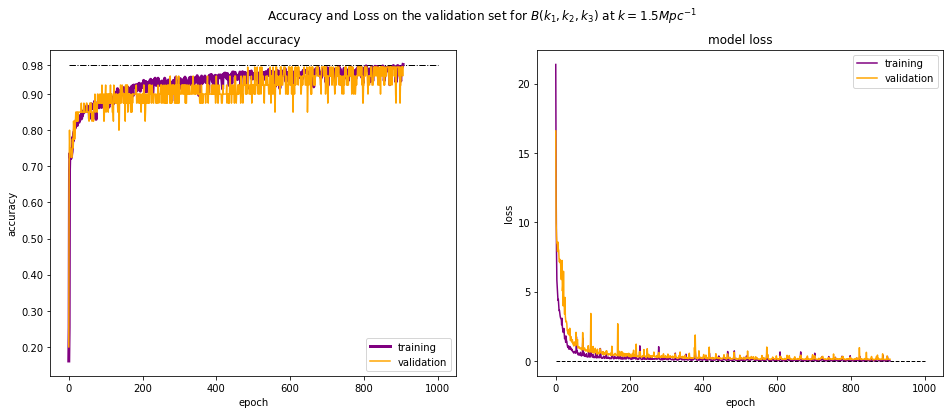

In [18]:
plt.figure(figsize=(16,6))

plt.suptitle(r'Accuracy and Loss on the validation set for $B(k_1,k_2,k_3)$ at $k =1.5Mpc^{-1}$')
plt.subplot(1,2,1)
#plt.hline()
c = list(np.arange(0,1,0.1))
c.append(0.98)
plt.yticks(c)
plt.plot(history.history['accuracy'],lw=3,color = 'purple')
plt.plot(history.history['val_accuracy'],color='orange',)
plt.hlines(y = 0.98,xmin=0,xmax=1000,linestyles='dashdot',lw =1)

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='lower right')

# summarize history for loss
plt.subplot(1,2,2)

plt.plot(history.history['loss'],color = 'purple')
plt.plot(history.history['val_loss'],color='orange')
plt.hlines(y = 0,xmin=0,xmax=1000,linestyles='dashed',lw =1)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.savefig('lvac1')